# Analyse Chainer CIFAR100 performance of GradientMethod update()

### Inspect timings in chainer_debug.log

In [4]:
%matplotlib inline
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os.path
import datetime
from cycler import cycler
import pandas as pd

In [5]:
!ls *.log

chainer_timings_K80_b128e1.log
chainer_timings_k80_b64e1.log
chainer_timings_mouse_b128e1.log
chainer_timings_mouse_b64e1.log
chainer_timings_mouse_convert_b128e1.log
chainer_timings_mouse_convert_b32e1.log
chainer_timings_mouse_convert_b64e1.log
chainer_timings_mouse_cuda_b64e1.log
chainer_timings_mouse_update_b64e1.log
cupy_logs064.log
cupy_logs128.log


In [41]:
filename1="chainer_timings_mouse_update_b64e1.log"
print "Reading",filename1
log_data1 = pd.read_csv(filename1,header=[0], skiprows=[0])
log_data1.iloc[:5]

Reading chainer_timings_mouse_update_b64e1.log


,Address,Parameter,Value
0,optimizer.py/GradientMethod/update,point1_delta (s),0.728212
1,optimizer.py/GradientMethod/update,point1_delta2(s),0.728212
2,optimizer.py/GradientMethod/update,point2_delta (s),0.014300
3,optimizer.py/GradientMethod/update,point2_delta2(s),0.014301
4,optimizer.py/GradientMethod/update,point1_delta (s),0.006631


In [47]:
df=log_data1.copy()
df.drop(df.columns[[0]],axis=1,inplace=True)
df = df[df["Parameter"].str.contains("_delta ")]
df.iloc[:5]

,Parameter,Value
0,point1_delta (s),0.728212
2,point2_delta (s),0.014300
4,point1_delta (s),0.006631
6,point2_delta (s),0.008222
8,point1_delta (s),0.006481


In [48]:
pat = re.compile("[0-9\.]+")
# Extract float number from a string
def parseFloat(s):
    global pat
    if type(s) is not str:
        return s
    f = pat.search(s)
    if f is not None:
        d = float(f.group())
        return d
    return None

In [49]:
forward = df[df["Parameter"].str.contains("point1")]
forward[["Value"]]=forward[["Value"]].applymap(parseFloat)
bacward = df[df["Parameter"].str.contains("point2")]
bacward[["Value"]]=bacward[["Value"]].applymap(parseFloat)
#forward.drop("Parameter", axis=1,inplace=True)
bacward.iloc[:4]

,Parameter,Value
2,point2_delta (s),0.014300
6,point2_delta (s),0.008222
10,point2_delta (s),0.007953
14,point2_delta (s),0.007910


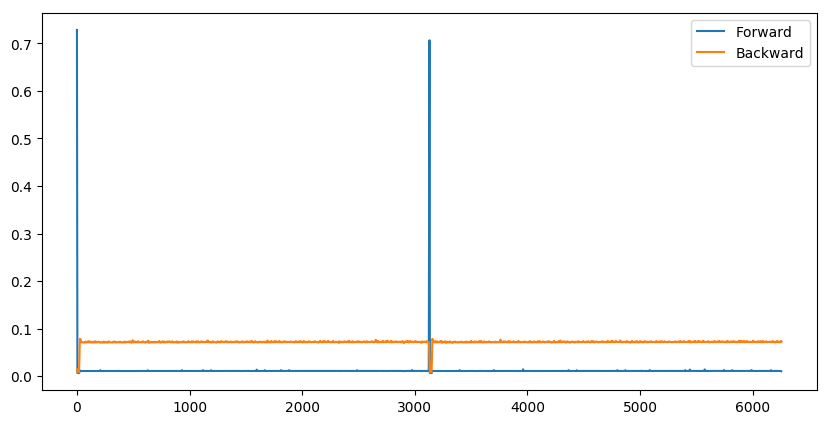

In [50]:
plt.rcParams['figure.figsize'] = 10,5 
ax = forward.plot(y="Value",label="Forward")
bacward.plot(ax=ax,y="Value",label="Backward")
for ax in axarr:
    ax.yaxis.grid('on', alpha=0.5, ls=":" )
    


In [51]:
print "sum1=",forward[["Value"]].sum().sum(),"s"
print "sum2=",bacward[["Value"]].sum().sum(),"s"

sum1= 18.421708 s
sum2= 111.659317 s
